In [1]:
from mnist import MNIST
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(train_X, train_y), (test_X, test_y) = mnist.load_data() #load images and labels

In [2]:
print(train_X.shape)
print(train_X[0].shape)
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1]**2) #reshape images to be vectors

(60000, 28, 28)
(28, 28)


In [3]:
train_y.shape

(60000,)

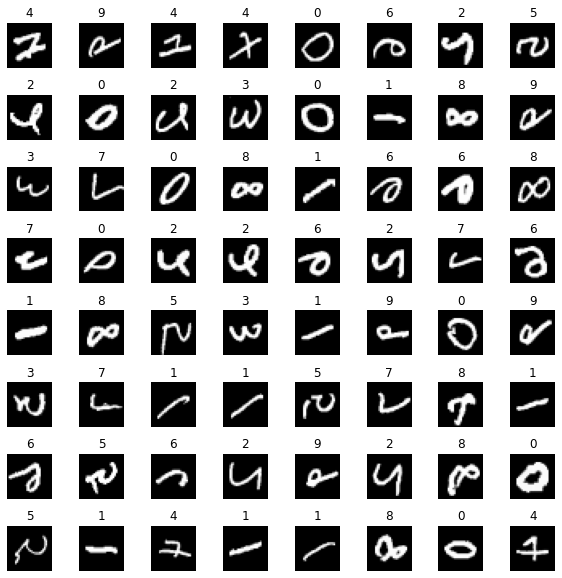

In [4]:
m, n = train_X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices
    X_random_reshaped = train_X[random_index].reshape((28,28)).T
    
    # Display the image and label
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(train_y[random_index])
    ax.set_axis_off()

In [5]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size
        Dense(units = 25,activation = "relu"),
        Dense(units =15,activation = "relu"),
        Dense(units =10,activation = "softmax")
        
    ], name = "my_model" 
)       
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #spars - y can only take one from 10 values
    optimizer=tf.keras.optimizers.Adam(0.001),          #logists - Z function 
)

history = model.fit(
    train_X,train_y,
    epochs=20
)

Epoch 1/20


c:\Users\darklane\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 4s 2ms/step - loss: 1.4097
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6367
Epoch 3/20
1875/1875 [==============================] - 2s 959us/step - loss: 0.4961
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4341
Epoch 5/20
1875/1875 [==============================] - 2s 978us/step - loss: 0.3908
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3613
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3389
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3223
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3006
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2789
Epoch 11/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2596
Epoch 12/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2466
Epoch 13

In [7]:
print()
model.predict(test_X[0].reshape(1,784))


1/1 [==============================] - 0s 68ms/step


array([[1.13512364e-07, 2.12029090e-06, 2.29754881e-03, 6.32701704e-05,
        3.70170206e-08, 7.93403672e-08, 1.51410636e-13, 9.97636676e-01,
        2.03569245e-10, 2.22759084e-07]], dtype=float32)

1/1 [==============================] - 0s 16ms/step


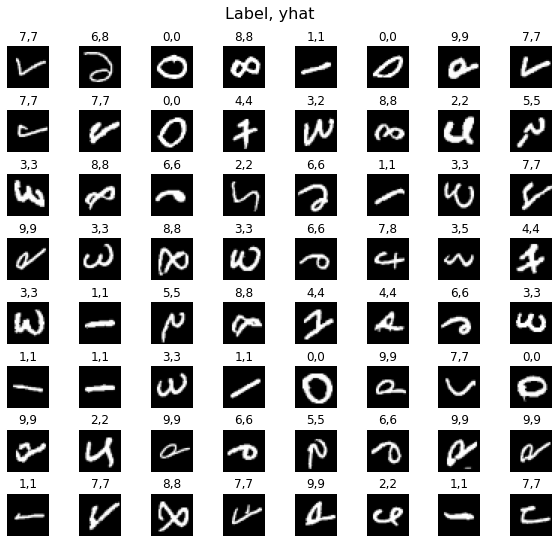

In [8]:
m, n = train_X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = train_X[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(train_X[random_index].reshape(1,784))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)

    # Display the label above the image
    ax.set_title(f"{train_y[random_index]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=16)
plt.show()

In [13]:
tf.keras.utils.plot_model(model, show_shapes=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
